In [ ]:
# Import Libraries
import requests
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [ ]:
# The List of 10 types of cryptocurrency
coin_list = [
    'BTC', 'ETH', 'USDT', 'SOL', 'BNB', 'XRP', 
    'DOGE', 'USDC', 'ADA', 'AVAX'
]


In [ ]:
# Defining the dataframe
main_df = pd.DataFrame()

In [23]:

# Your CoinMarketCap API key
api_key = '160c849f-599e-49ed-8346-bd786db76ed7'  # Replace with your API key

# CoinMarketCap API URL
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

# Parameters for the API request
parameters = {
    'start': '1',  # Starting from the first cryptocurrency
    'limit': '10',  # Limit to 10 cryptocurrencies
    'convert': 'USD'  # Convert to USD
}

# Headers with your API key
headers = {
    'Accept': 'application/json',
    'X-CMC_PRO_API_KEY': api_key  # Use your API key here
}

# Make the request
response = requests.get(url, headers=headers, params=parameters)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()  # Parse the response into JSON format
    for coin in data['data']:
        print(f"Name: {coin['name']}, Symbol: {coin['symbol']}, Price: ${coin['quote']['USD']['price']}")
else:
    print(f"Error {response.status_code}: {response.text}")


Name: Bitcoin, Symbol: BTC, Price: $92230.99953042947
Name: Ethereum, Symbol: ETH, Price: $3263.0714221441276
Name: Tether USDt, Symbol: USDT, Price: $1.000342409975126
Name: Solana, Symbol: SOL, Price: $224.68160264647963
Name: BNB, Symbol: BNB, Price: $601.7491191013997
Name: XRP, Symbol: XRP, Price: $1.3434617260711612
Name: Dogecoin, Symbol: DOGE, Price: $0.37226540836603794
Name: USDC, Symbol: USDC, Price: $1.0000895399391565
Name: Cardano, Symbol: ADA, Price: $0.8980918093443053
Name: Avalanche, Symbol: AVAX, Price: $41.031305149446425


In [ ]:
# Extract relevant information from the data dictionary
coin_data = []
for coin in data['data']:
    coin_info = {
        'id': coin['id'],
        'name': coin['name'],
        'symbol': coin['symbol'],
        'price': coin['quote']['USD']['price'],
        'volume_24h': coin['quote']['USD']['volume_24h'],
        'market_cap': coin['quote']['USD']['market_cap']
    }
    coin_data.append(coin_info)

# Convert the list of dictionaries into a pandas DataFrame
coin_df = pd.DataFrame(coin_data)

# Display the DataFrame
print(coin_df)

     id         name symbol         price    volume_24h    market_cap
0     1      Bitcoin    BTC  92230.999530  9.470240e+10  1.825046e+12
1  1027     Ethereum    ETH   3263.071422  4.372001e+10  3.929842e+11
2   825  Tether USDt   USDT      1.000342  1.886772e+11  1.327895e+11
3  5426       Solana    SOL    224.681603  7.287023e+09  1.066847e+11
4  1839          BNB    BNB    601.749119  2.649436e+09  8.665798e+10
5    52          XRP    XRP      1.343462  9.654628e+09  7.657578e+10
6    74     Dogecoin   DOGE      0.372265  9.711933e+09  5.470623e+10
7  3408         USDC   USDC      1.000090  1.408502e+10  3.861753e+10
8  2010      Cardano    ADA      0.898092  2.957900e+09  3.149947e+10
9  5805    Avalanche   AVAX     41.031305  1.613144e+09  1.679210e+10


In [ ]:
# Add a 'Timestamp' column to coin_df
coin_df['Timestamp'] = pd.date_range(start=datetime.now(), periods=len(coin_df), freq='T').astype('int64') / 10**6

# Initialize insert_ids_list
insert_ids_list = [0]  # or any initial value to enter the while loop

while len(insert_ids_list) > 0:
    timestamp_checking = np.array(coin_df['Timestamp'][1:]) - np.array(coin_df['Timestamp'][:-1])
    insert_ids_list = np.where(timestamp_checking != 60000)[0]
    if len(insert_ids_list) > 0:
        print(str(len(insert_ids_list)) + ' mismatched.')
        insert_ids = insert_ids_list[0]
        temp_df = coin_df.iloc[insert_ids].repeat(int(timestamp_checking[insert_ids] / 60000) - 1).reset_index(drop=True)
        temp_df['Timestamp'] = [temp_df['Timestamp'][0] + i * 60000 for i in range(1, len(temp_df) + 1)]
        coin_df = coin_df.loc[:insert_ids].append(temp_df).append(coin_df.loc[insert_ids + 1:]).reset_index(drop=True)
        insert_ids_list = insert_ids_list[1:]

In [ ]:
# Ensure df is defined and contains the 'Timestamp' column
df = coin_df.copy()  # Assuming you want to use coin_df as the base dataframe
df['Datetime'] = [datetime.now() - relativedelta(minutes=len(df)-i) for i in range(0, len(df))]
coin_df = pd.concat([df, coin_df])

# Ensure datetime_end and datetime_start are defined
datetime_end = datetime.now()
datetime_start = datetime_end - relativedelta(minutes=len(df))

coin_df['Symbol'] = coin_df['symbol']
main_df = pd.concat([main_df, coin_df], ignore_index=True)

In [ ]:
# Add 'Open', 'High', 'Low', 'Close' columns based on 'price'
main_df['High'] = main_df['price']
main_df['Open'] = main_df['price']
main_df['Low'] = main_df['price']
main_df['Close'] = main_df['price']

In [ ]:
# Print the main_df with selected columns
print(main_df[['Datetime', 'Symbol', 'Open', 'High', 'Low', 'Close']])

# Filter the main_df to include only the cryptocurrencies in coin_list
filtered_df = main_df[main_df['Symbol'].isin(coin_list)]

# Print the filtered_df with selected columns
print(filtered_df[['Datetime', 'Symbol', 'Open', 'High', 'Low', 'Close']])

                     Datetime Symbol          Open          High  \
0  2024-11-27 00:04:46.957110    BTC  92230.999530  92230.999530   
1  2024-11-27 00:05:46.957110    ETH   3263.071422   3263.071422   
2  2024-11-27 00:06:46.957110   USDT      1.000342      1.000342   
3  2024-11-27 00:07:46.957110    SOL    224.681603    224.681603   
4  2024-11-27 00:08:46.957110    BNB    601.749119    601.749119   
5  2024-11-27 00:09:46.957110    XRP      1.343462      1.343462   
6  2024-11-27 00:10:46.957110   DOGE      0.372265      0.372265   
7  2024-11-27 00:11:46.957110   USDC      1.000090      1.000090   
8  2024-11-27 00:12:46.957110    ADA      0.898092      0.898092   
9  2024-11-27 00:13:46.957110   AVAX     41.031305     41.031305   
10                        NaT    BTC  92230.999530  92230.999530   
11                        NaT    ETH   3263.071422   3263.071422   
12                        NaT   USDT      1.000342      1.000342   
13                        NaT    SOL    224.6816

In [10]:
final_close_price = main_df['Close'].iloc[-1]
print(f"The final close price is: {final_close_price}")

The final close price is: 41.031305149446425


In [11]:
highest_close_price = main_df['Close'].max()
print(f"The highest close price is: {highest_close_price}")

The highest close price is: 92230.99953042947


In [12]:
lowest_close_price = main_df['Close'].min()
print(f"The lowest close price is: {lowest_close_price}")

The lowest close price is: 0.37226540836603794


In [13]:
average_daily_volume = main_df['volume_24h'].mean()
print(f"The average daily volume is: {average_daily_volume}")

The average daily volume is: 37505866039.48026


In [34]:
# Ensure the 'Datetime' column is in datetime format
main_df['Datetime'] = pd.to_datetime(main_df['Datetime'])

# Define the date range
start_date = '2024-11-26'
end_date = '2024-11-27'

# Filter the dataframe by the date range
filtered_df = main_df[(main_df['Datetime'] >= start_date) & (main_df['Datetime'] <= end_date)]

# Group by date and calculate the average volume
average_volume_by_date = filtered_df.groupby(filtered_df['Datetime'].dt.date)['volume_24h'].mean()

# Print the result
print(average_volume_by_date)

Series([], Name: volume_24h, dtype: float64)


In [36]:
# Select relevant columns for the price comparison table
price_comparison_df = coin_df[['name', 'symbol', 'price']]

# Display the price comparison table
print(price_comparison_df)

          name symbol         price
0      Bitcoin    BTC  92230.999530
1     Ethereum    ETH   3263.071422
2  Tether USDt   USDT      1.000342
3       Solana    SOL    224.681603
4          BNB    BNB    601.749119
5          XRP    XRP      1.343462
6     Dogecoin   DOGE      0.372265
7         USDC   USDC      1.000090
8      Cardano    ADA      0.898092
9    Avalanche   AVAX     41.031305
0      Bitcoin    BTC  92230.999530
1     Ethereum    ETH   3263.071422
2  Tether USDt   USDT      1.000342
3       Solana    SOL    224.681603
4          BNB    BNB    601.749119
5          XRP    XRP      1.343462
6     Dogecoin   DOGE      0.372265
7         USDC   USDC      1.000090
8      Cardano    ADA      0.898092
9    Avalanche   AVAX     41.031305


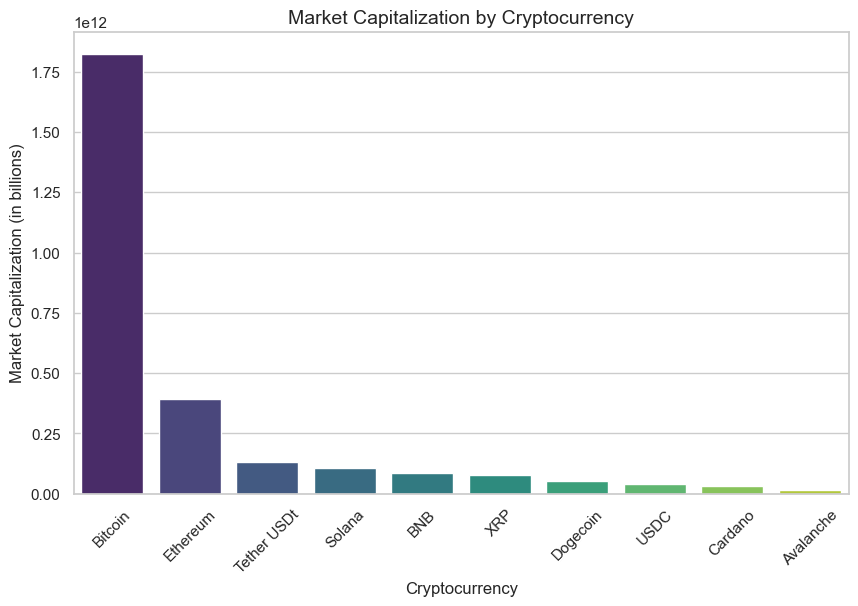

In [47]:
import seaborn as sns

# Set up a color palette
sns.set_theme(style="whitegrid")

# 1. Bar Chart: Market Capitalization by Cryptocurrency
plt.figure(figsize=(10, 6))
sns.barplot(data=coin_df, x="name", y="market_cap", palette="viridis")
plt.title("Market Capitalization by Cryptocurrency", fontsize=14)
plt.xlabel("Cryptocurrency", fontsize=12)
plt.ylabel("Market Capitalization (in billions)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

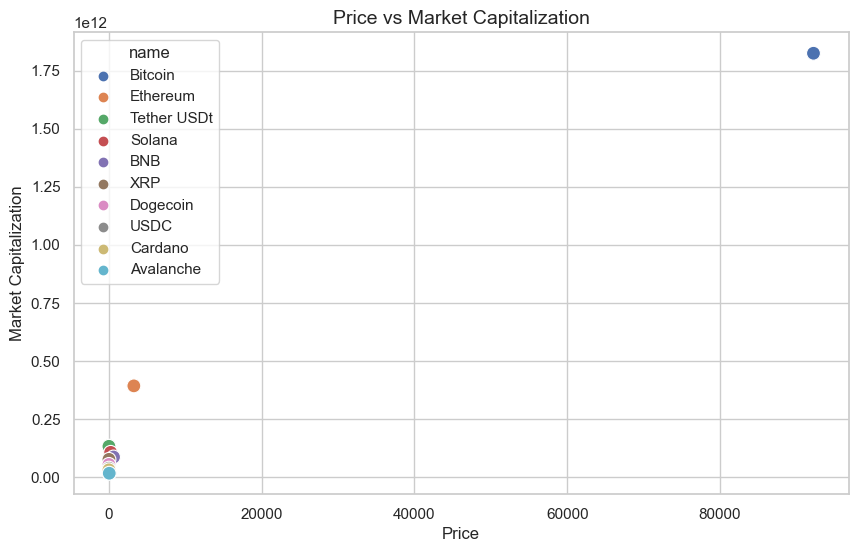

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=coin_df, x="price", y="market_cap", hue="name", palette="deep", s=100)
plt.title("Price vs Market Capitalization", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Market Capitalization", fontsize=12)
plt.show()

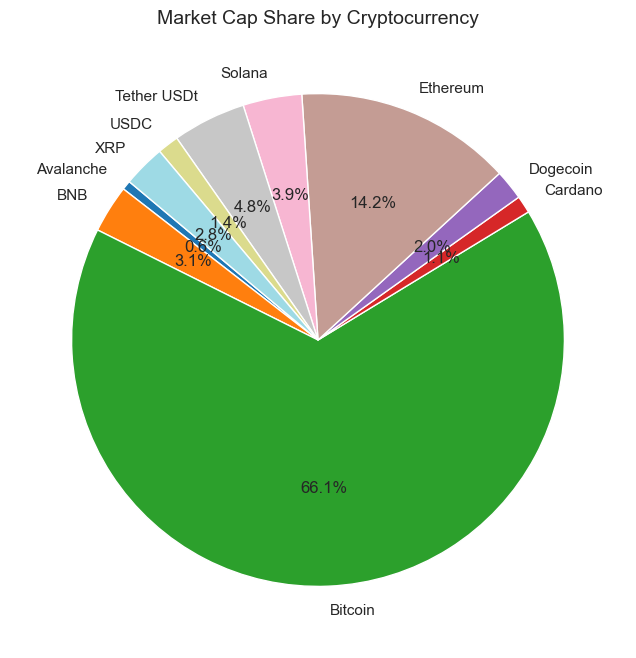

In [49]:
plt.figure(figsize=(8, 8))
coin_df.groupby("name")["market_cap"].sum().plot.pie(autopct="%1.1f%%", startangle=140, cmap="tab20")
plt.title("Market Cap Share by Cryptocurrency", fontsize=14)
plt.ylabel("")  # Remove y-axis label for clarity
plt.show()

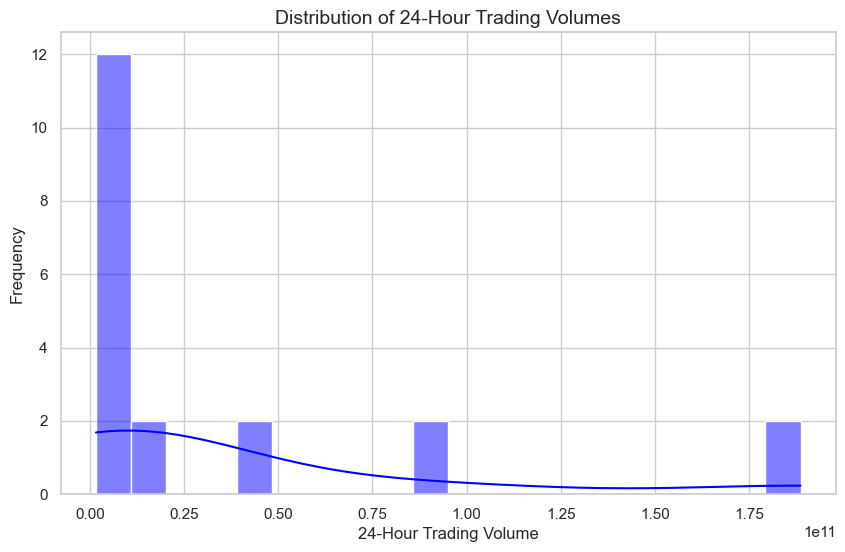

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(data=coin_df, x="volume_24h", bins=20, kde=True, color="blue")
plt.title("Distribution of 24-Hour Trading Volumes", fontsize=14)
plt.xlabel("24-Hour Trading Volume", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()